In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#importing packages
import seaborn as sns
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from scipy.stats import norm, skew
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler


**Employee_Future_Prediction_EDA**

Abstract:

Employee attrition is downsizing in any organization where employees resign. Employees are valuable assets of any organization. It is necessary to know whether the employees are dissatisfied or whether there are other reasons for leaving their respective jobs.

Nowadays, for better opportunities, employees are eager to move from one organization to another. But if they quit their jobs unexpectedly, it can result in a huge loss for the organization. A new hire will consume money and time, and newly hired employees will also take time to make the respective organization profitable.

Retaining skilled and hardworking employees is one of the most critical challenges many organizations face. Therefore, by improving employee satisfaction and providing a desirable working environment, we can certainly reduce this problem significantly.


Questions:

* What are the data types? (Only numeric and categorical)

* Are there missing values?

* What are the likely distributions of the numeric variables?

* Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

* Which independent variables have missing data? How much? 

* Do the training and test sets have the same data?

* In the predictor variables independent of all the other predictor variables?

* Which predictor variables are the most important?

* Do the ranges of the predictor variables make sense?

* What are the distributions of the predictor variables?   

* Remove outliers and keep outliers (does if have an effect of the final predictive model)?

* Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

For categorical data, calculate the accuracy and a confusion matrix.



In [2]:
df = pd.read_csv("/content/Employee.csv")


In [3]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [4]:
#DataTypes
df.dtypes

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object

Both numerical and categorial data types are present in the data set

In [5]:
#Missing_Values
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [6]:
df.Education.unique()


array(['Bachelors', 'Masters', 'PHD'], dtype=object)

There are no missing values

In [7]:
df.Education.isna().sum()

0

In [8]:
df.Education

0       Bachelors
1       Bachelors
2       Bachelors
3         Masters
4         Masters
          ...    
4648    Bachelors
4649      Masters
4650      Masters
4651    Bachelors
4652    Bachelors
Name: Education, Length: 4653, dtype: object

In [9]:
df = pd.get_dummies(df)

In [10]:
df.dtypes

JoiningYear                  int64
PaymentTier                  int64
Age                          int64
ExperienceInCurrentDomain    int64
LeaveOrNot                   int64
Education_Bachelors          uint8
Education_Masters            uint8
Education_PHD                uint8
City_Bangalore               uint8
City_New Delhi               uint8
City_Pune                    uint8
Gender_Female                uint8
Gender_Male                  uint8
EverBenched_No               uint8
EverBenched_Yes              uint8
dtype: object

In [11]:
#changing data type from uint to int:
df['Education_Bachelors']=df['Education_Bachelors'].astype(int)
df['Education_Masters']=df['Education_Masters'].astype(int)
df['Education_PHD']=df['Education_PHD'].astype(int)
df['City_Bangalore']=df['City_Bangalore'].astype(int)
df['City_New Delhi']=df['City_New Delhi'].astype(int)
df['City_Pune']=df['City_Pune'].astype(int)
df['EverBenched_No']=df['EverBenched_No'].astype(int)
df['EverBenched_Yes']=df['EverBenched_Yes'].astype(int)
df['Gender_Male']=df['Gender_Male'].astype(int)
df['Gender_Female']=df['Gender_Female'].astype(int)


In [12]:
df.dtypes

JoiningYear                  int64
PaymentTier                  int64
Age                          int64
ExperienceInCurrentDomain    int64
LeaveOrNot                   int64
Education_Bachelors          int64
Education_Masters            int64
Education_PHD                int64
City_Bangalore               int64
City_New Delhi               int64
City_Pune                    int64
Gender_Female                int64
Gender_Male                  int64
EverBenched_No               int64
EverBenched_Yes              int64
dtype: object

In [13]:
df_new= df.copy()

**What are the likely distributions of the numeric variables?**

<Figure size 576x360 with 0 Axes>

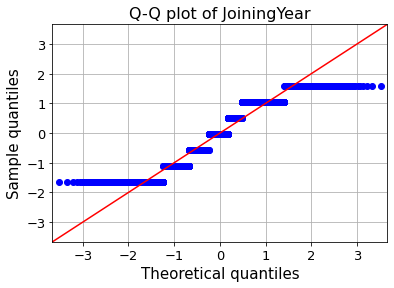

<Figure size 576x360 with 0 Axes>

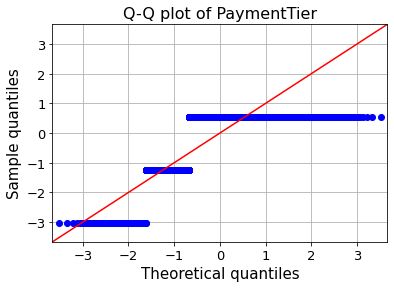

<Figure size 576x360 with 0 Axes>

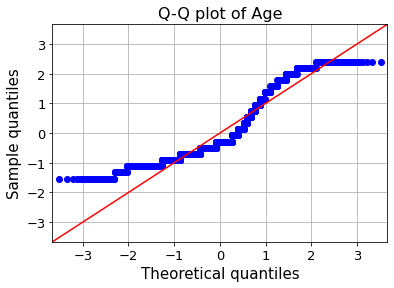

<Figure size 576x360 with 0 Axes>

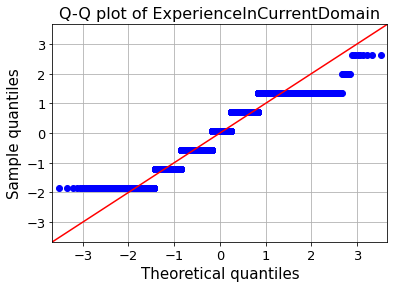

<Figure size 576x360 with 0 Axes>

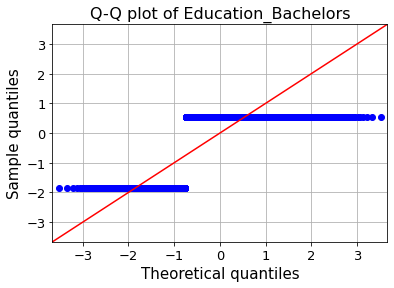

<Figure size 576x360 with 0 Axes>

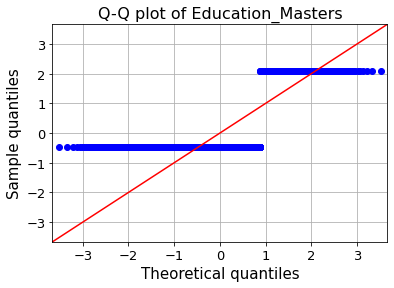

<Figure size 576x360 with 0 Axes>

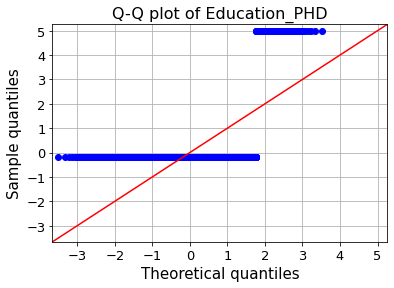

<Figure size 576x360 with 0 Axes>

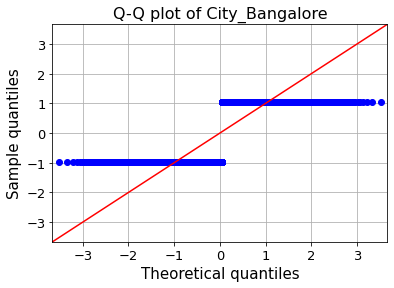

<Figure size 576x360 with 0 Axes>

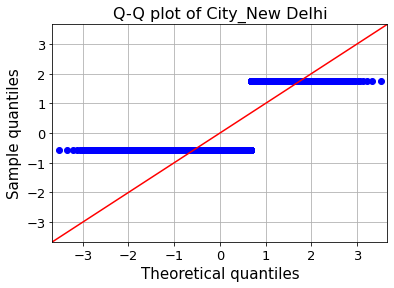

<Figure size 576x360 with 0 Axes>

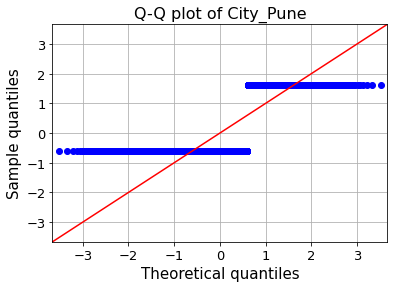

<Figure size 576x360 with 0 Axes>

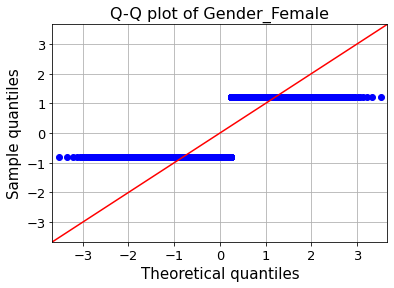

<Figure size 576x360 with 0 Axes>

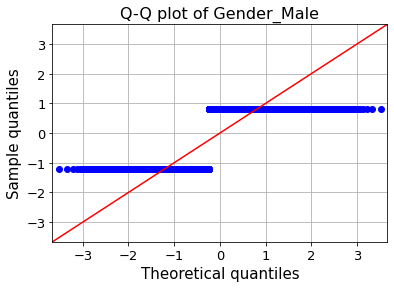

<Figure size 576x360 with 0 Axes>

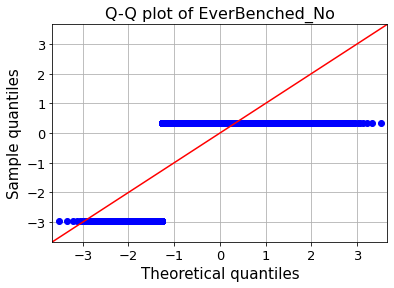

<Figure size 576x360 with 0 Axes>

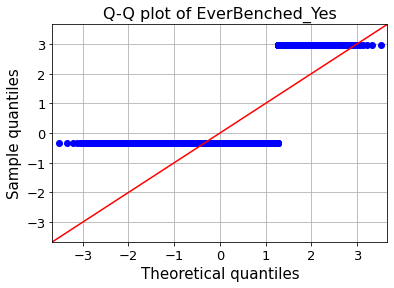

In [14]:
#checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot
data_norm=df[['JoiningYear', 'PaymentTier', 'Age' , 'ExperienceInCurrentDomain' ,'Education_Bachelors','Education_Masters','Education_PHD','City_Bangalore','City_New Delhi','City_Pune','Gender_Female','Gender_Male','EverBenched_No','EverBenched_Yes']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

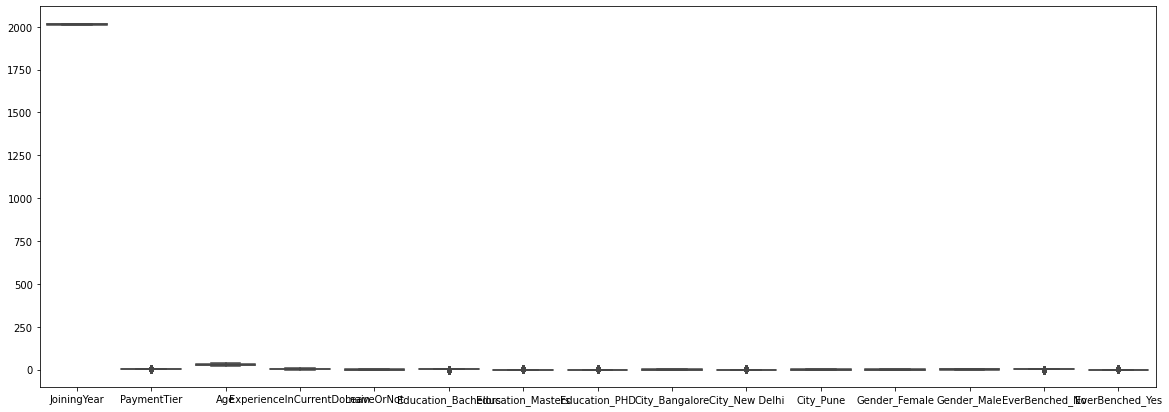

In [16]:
#Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(20,7))
sns.boxplot(data=df)


In [18]:
#checking the correlation between all the features in the data
df.corr()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,Education_Bachelors,Education_Masters,Education_PHD,City_Bangalore,City_New Delhi,City_Pune,Gender_Female,Gender_Male,EverBenched_No,EverBenched_Yes
JoiningYear,1.000000,-0.096078,0.013165,-0.036525,0.181705,-0.178347,0.191759,-0.001362,-0.104668,0.141744,-0.020167,0.012213,-0.012213,-0.049353,0.049353
PaymentTier,-0.096078,1.000000,0.007631,0.018314,-0.197638,0.180820,-0.199632,0.011966,0.293730,-0.102642,-0.229910,-0.235119,0.235119,-0.019207,0.019207
Age,0.013165,0.007631,1.000000,-0.134643,-0.051126,0.011365,-0.010192,-0.004029,0.039918,-0.032461,-0.013273,0.003866,-0.003866,0.016135,-0.016135
ExperienceInCurrentDomain,-0.036525,0.018314,-0.134643,1.000000,-0.030504,0.005852,-0.006584,0.000637,0.011654,-0.007608,-0.005690,-0.008745,0.008745,-0.001408,0.001408
LeaveOrNot,0.181705,-0.197638,-0.051126,-0.030504,1.000000,-0.118176,0.145801,-0.038938,-0.154996,-0.033341,0.206264,0.220701,-0.220701,-0.078438,0.078438
Education_Bachelors,-0.178347,0.180820,0.011365,0.005852,-0.118176,1.000000,-0.889129,-0.370069,0.337067,-0.426035,0.035406,-0.016843,0.016843,-0.039043,0.039043
Education_Masters,0.191759,-0.199632,-0.010192,-0.006584,0.145801,-0.889129,1.000000,-0.096126,-0.323998,0.381977,-0.007299,0.021561,-0.021561,0.013930,-0.013930
Education_PHD,-0.001362,0.011966,-0.004029,0.000637,-0.038938,-0.370069,-0.096126,1.000000,-0.075407,0.151214,-0.062189,-0.007133,0.007133,0.056639,-0.056639
City_Bangalore,-0.104668,0.293730,0.039918,0.011654,-0.154996,0.337067,-0.323998,-0.075407,1.000000,-0.551420,-0.586654,-0.209460,0.209460,-0.018590,0.018590
City_New Delhi,0.141744,-0.102642,-0.032461,-0.007608,-0.033341,-0.426035,0.381977,0.151214,-0.551420,1.000000,-0.352096,0.155877,-0.155877,0.029246,-0.029246


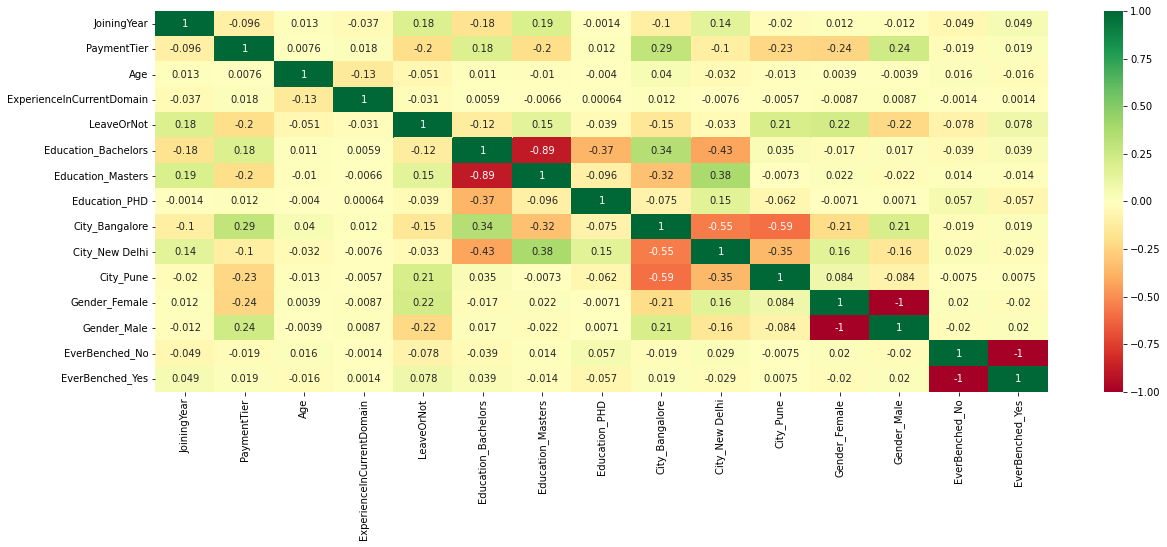

In [20]:
#the heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')

In [21]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(df['LeaveOrNot'], df[['JoiningYear', 'PaymentTier', 'Age' , 'ExperienceInCurrentDomain' ,'Education_Bachelors','Education_Masters','Education_PHD','City_Bangalore','City_New Delhi','City_Pune','Gender_Female','Gender_Male','EverBenched_No','EverBenched_Yes' ]]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             LeaveOrNot   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     82.40
Date:                Mon, 10 Oct 2022   Prob (F-statistic):          1.25e-156
Time:                        03:34:01   Log-Likelihood:                -2758.3
No. Observations:                4653   AIC:                             5539.
Df Residuals:                    4642   BIC:                             5609.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
JoiningYear                   0.0403      0.004     11.398      0.000       0.033       0.047
PaymentTier                  -0.0743      0.012     -5.988      0.000      -0.099      -0.050
Age                          -0.0055      0.001     -4.092      0.000      -0.008      -0.003
ExperienceInCurrentDomain    -0.0086      0.004     -2.057      0.040      -0.017      -0.000
Education_Bachelors         -16.1458      1.426    -11.325      0.000     -18.941     -13.351
Education_Masters           -15.9838      1.428    -11.191      0.000     -18.784     -13.184
Education_PHD               -16.1358      1.426    -11.315      0.000     -18.932     -13.340
City_Bangalore              -16.1011      1.426    -11.289      0.000     -18.897     -13.305
City_New Delhi              -16.2099      1.427    -11.356      0.000     -19.008     -13.411
City_Pune                   -15.9545      1.426    -11.187      0.000     -18.750     -13.159
Gender_Female               -24.0356      2.140    -11.233      0.000     -28.230     -19.841
Gender_Male                 -24.2299      2.140    -11.323      0.000     -28.425     -20.035
EverBenched_No              -24.1903      2.139    -11.308      0.000     -28.384     -19.996
EverBenched_Yes             -24.0752      2.140    -11.248      0.000     -28.272     -19.879
==============================================================================
Omnibus:                     1166.608   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              407.835
Skew:                           0.532   Prob(JB):                     2.75e-89
Kurtosis:                       2.015   Cond. No.                     2.81e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.39e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Building the Model
Train and Test split:**

In [22]:
from sklearn.model_selection import  train_test_split

X = df[ ['JoiningYear', 'PaymentTier', 'Age' , 'ExperienceInCurrentDomain' ,'Education_Bachelors','Education_Masters','Education_PHD','City_Bangalore','City_New Delhi','City_Pune','Gender_Female','Gender_Male','EverBenched_No','EverBenched_Yes']]

y = df['LeaveOrNot']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

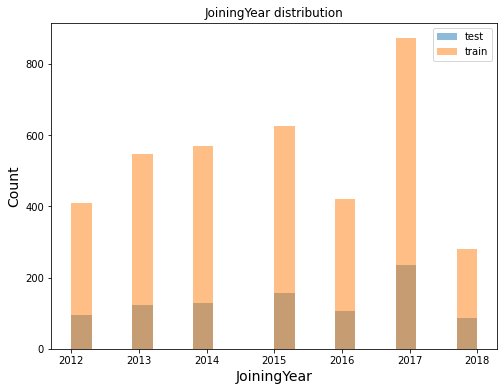

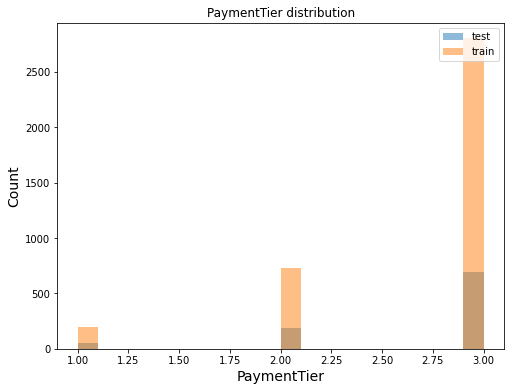

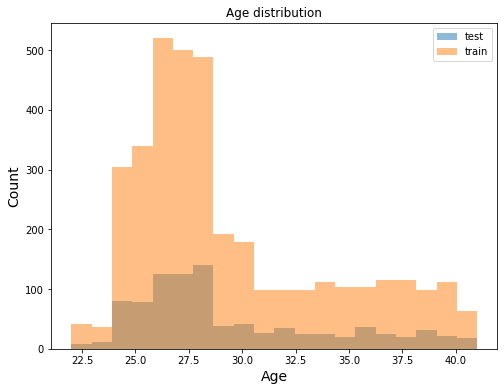

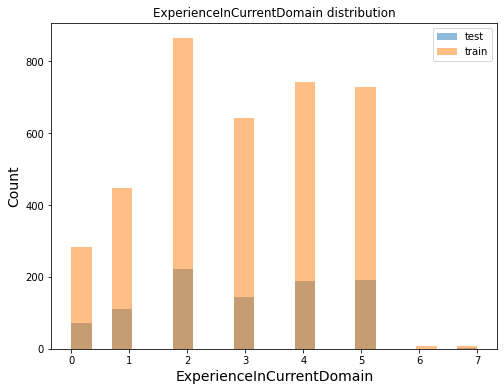

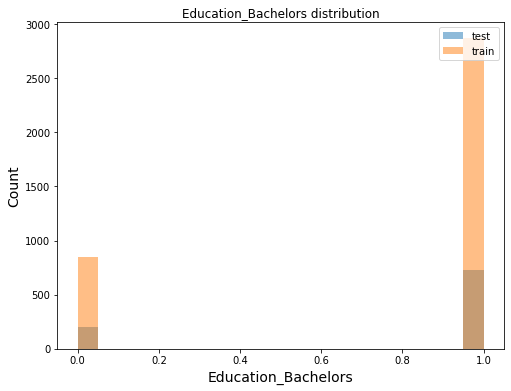

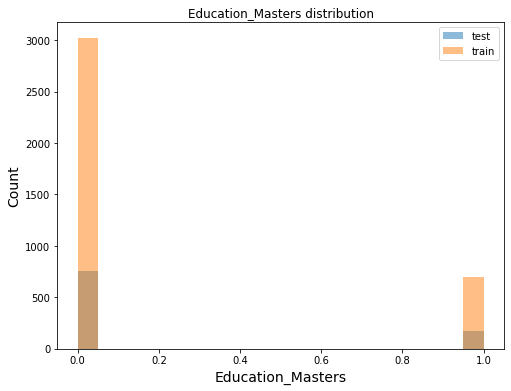

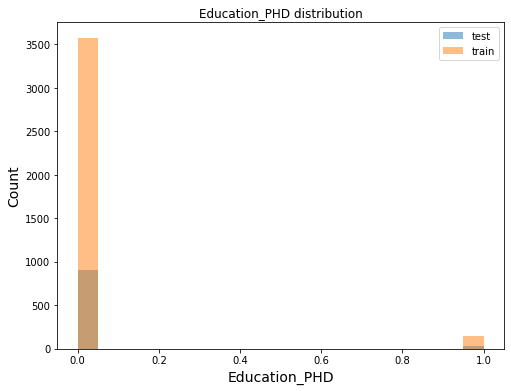

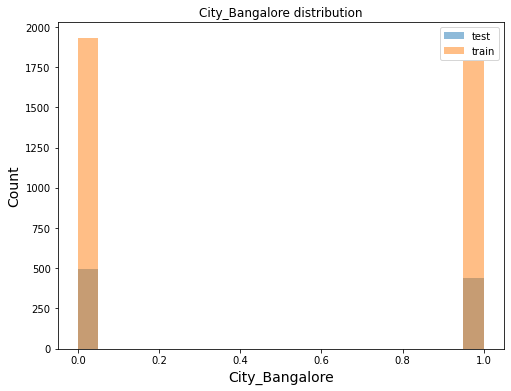

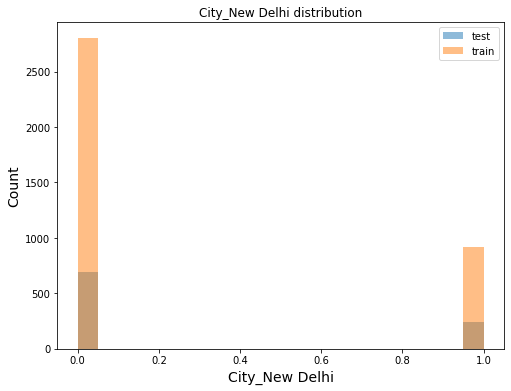

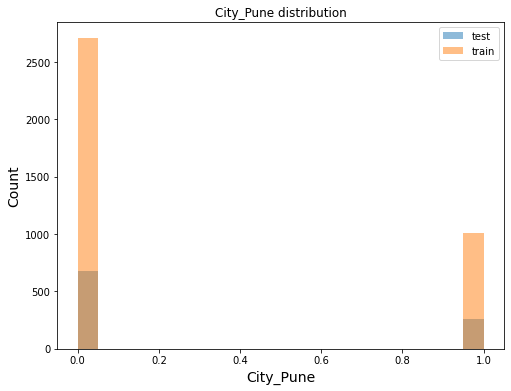

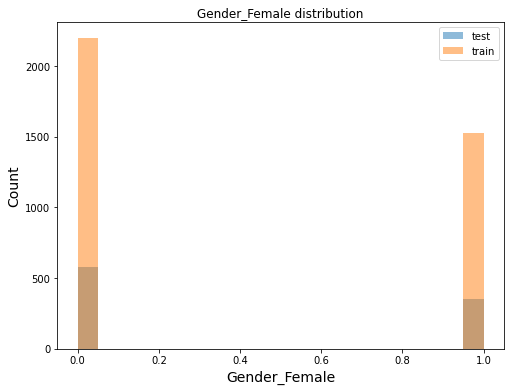

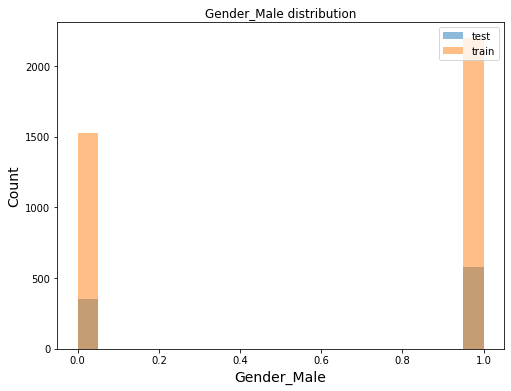

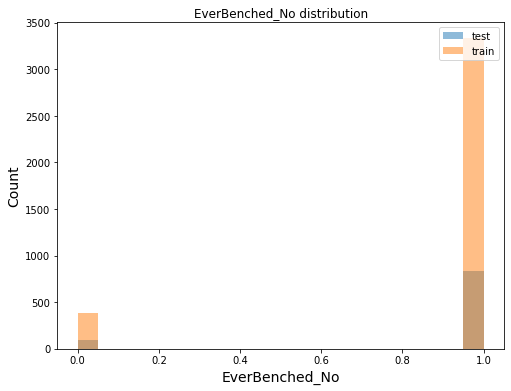

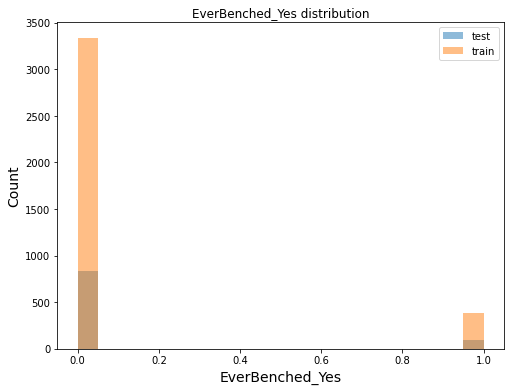

In [23]:
# Looking the data for test, training and validation set
X_test_plot = X_test[['JoiningYear', 'PaymentTier', 'Age' , 'ExperienceInCurrentDomain' ,'Education_Bachelors','Education_Masters','Education_PHD','City_Bangalore','City_New Delhi','City_Pune','Gender_Female','Gender_Male','EverBenched_No','EverBenched_Yes']]


X_train_plot = X_train[['JoiningYear', 'PaymentTier', 'Age' , 'ExperienceInCurrentDomain' ,'Education_Bachelors','Education_Masters','Education_PHD','City_Bangalore','City_New Delhi','City_Pune','Gender_Female','Gender_Male','EverBenched_No','EverBenched_Yes']]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()
 

**Logistic Regression:**

In [24]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

# Print the prediction accuracy
from sklearn import metrics
prediction_test = model.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.7110633727175081


In [26]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 5.3 MB/s 
     |████████████████████████████████| 133 kB 44.5 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=293a5e50656d0ed042e1e9d83a29be075e22375b167e756d80b2803ac40866ae
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


In [27]:
#Understanding the important features 
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0501 ± 0.0126,City_Pune
0.0286 ± 0.0059,Gender_Male
0.0264 ± 0.0091,Gender_Female
0.0187 ± 0.0130,City_New Delhi
0.0155 ± 0.0104,PaymentTier
0.0067 ± 0.0048,Education_Masters
0.0039 ± 0.0075,Age
0.0037 ± 0.0026,EverBenched_Yes
0.0032 ± 0.0043,EverBenched_No
0.0017 ± 0.0044,ExperienceInCurrentDomain


**Removing Outliers:**

In [28]:
scaler= StandardScaler()
X = scaler.fit_transform(X)

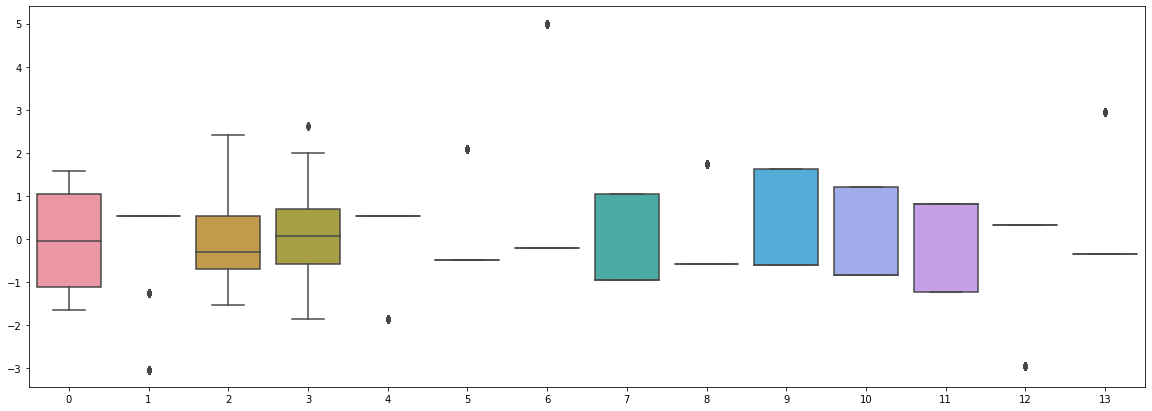

In [29]:
plt.figure(figsize=(20,7))
sns.boxplot(data=X)

In [30]:
Q1JY,Q3JY = np.percentile(df['JoiningYear'] , [25,75])
IQR1 = Q3JY - Q1JY

UJY = Q3JY + 1.5*IQR1

LJY = Q1JY - 1.5*IQR1

print(UJY)
print(LJY)

df_new.drop(df_new[df_new['JoiningYear'] < LJY].index, inplace=True)
df_new.drop(df_new[df_new['JoiningYear'] > UJY].index, inplace=True)

2023.0
2007.0


In [31]:
Q1PT,Q3PT = np.percentile(df['PaymentTier'] , [25,75])
IQR2 = Q3PT - Q1PT

UPT=Q3PT + 1.5*IQR2

LPT = Q1PT - 1.5*IQR2

print(UPT)
print(LPT)

df_new.drop(df_new[df_new['PaymentTier'] < LPT].index, inplace=True)
df_new.drop(df_new[df_new['PaymentTier'] > UPT].index, inplace=True)

3.0
3.0


In [32]:
Q1A,Q3A = np.percentile(df['Age'] , [25,75])
IQR3 = Q3A - Q1A

UA = Q3A + 1.5*IQR3

LA = Q1A - 1.5*IQR3

print(UA)
print(LA)

df_new.drop(df_new[df_new['Age'] < LA].index, inplace=True)
df_new.drop(df_new[df_new['Age'] > UA].index, inplace=True)

41.0
17.0


In [33]:
Q1Exp,Q3Exp = np.percentile(df['ExperienceInCurrentDomain'] , [25,75])
IQR4 = Q3Exp - Q1Exp

UExp = Q3Exp + 1.5*IQR4

LExp = Q1Exp - 1.5*IQR4

print(UExp)
print(LExp)

df_new.drop(df_new[df_new['ExperienceInCurrentDomain'] < LExp].index, inplace=True)
df_new.drop(df_new[df_new['ExperienceInCurrentDomain'] > UExp].index, inplace=True)

7.0
-1.0


In [34]:
Q1LN,Q3LN = np.percentile(df['LeaveOrNot'] , [25,75])
IQR5 = Q3LN - Q1LN

ULN = Q3LN + 1.5*IQR5

LLN = Q1LN - 1.5*IQR5

print(ULN)
print(LLN)

df_new.drop(df_new[df_new['LeaveOrNot'] < LLN].index, inplace=True)
df_new.drop(df_new[df_new['LeaveOrNot'] > ULN].index, inplace=True)

2.5
-1.5


In [35]:
Q1ED,Q3ED = np.percentile(df['Education_Bachelors'] , [25,75])
IQR6 = Q3ED - Q1ED

UED = Q3ED + 1.5*IQR6

LED = Q1ED - 1.5*IQR6

print(UED)
print(LED)

df_new.drop(df_new[df_new['Education_Bachelors'] < LED].index, inplace=True)
df_new.drop(df_new[df_new['Education_Bachelors'] > UED].index, inplace=True)

1.0
1.0


In [36]:
Q1EM,Q3EM = np.percentile(df['Education_Masters'] , [25,75])
IQR7 = Q3EM - Q1EM

UEM = Q3EM + 1.5*IQR7

LEM = Q1EM - 1.5*IQR7

print(UEM)
print(LEM)

df_new.drop(df_new[df_new['Education_Masters'] < LEM].index, inplace=True)
df_new.drop(df_new[df_new['Education_Masters'] > UEM].index, inplace=True)

0.0
0.0


In [37]:
Q1EP,Q3EP = np.percentile(df['Education_PHD'] , [25,75])
IQR8 = Q3EP - Q1EP

UEP = Q3EP + 1.5*IQR8

LEP = Q1EP - 1.5*IQR8

print(UEP)
print(LEP)

df_new.drop(df_new[df_new['Education_PHD'] < LEP].index, inplace=True)
df_new.drop(df_new[df_new['Education_PHD'] > UEP].index, inplace=True)

0.0
0.0


In [38]:
Q1CB,Q3CB = np.percentile(df['City_Bangalore'] , [25,75])
IQR9 = Q3CB - Q1CB

UCB = Q3CB + 1.5*IQR9

LCB = Q1CB - 1.5*IQR9

print(UCB)
print(LCB)

df_new.drop(df_new[df_new['City_Bangalore'] < LCB].index, inplace=True)
df_new.drop(df_new[df_new['City_Bangalore'] > UCB].index, inplace=True)

2.5
-1.5


In [39]:
Q1CND,Q3CND = np.percentile(df['City_New Delhi'] , [25,75])
IQR10 = Q3CND - Q1CND

UCND = Q3CND + 1.5*IQR10

LCND = Q1CND - 1.5*IQR10

print(UCND)
print(LCND)

df_new.drop(df_new[df_new['City_New Delhi'] < LCND].index, inplace=True)
df_new.drop(df_new[df_new['City_New Delhi'] > UCND].index, inplace=True)

0.0
0.0


In [40]:
Q1CP,Q3CP = np.percentile(df['City_Pune'] , [25,75])
IQR11 = Q3CP - Q1CP

UCP = Q3CP + 1.5*IQR11

LCP = Q1CP - 1.5*IQR11

print(UCP)
print(LCP)

df_new.drop(df_new[df_new['City_Pune'] < LCP].index, inplace=True)
df_new.drop(df_new[df_new['City_Pune'] > UCP].index, inplace=True)

2.5
-1.5


In [41]:
Q1GF,Q3GF = np.percentile(df['Gender_Female'] , [25,75])
IQR12 = Q3GF - Q1GF

UGF = Q3GF + 1.5*IQR12

LGF = Q1GF - 1.5*IQR12

print(UGF)
print(LGF)

df_new.drop(df_new[df_new['Gender_Female'] < LGF].index, inplace=True)
df_new.drop(df_new[df_new['Gender_Female'] > UGF].index, inplace=True)

2.5
-1.5


In [42]:
Q1GM,Q3GM = np.percentile(df['Gender_Male'] , [25,75])
IQR13 = Q3GM - Q1GM

UGM = Q3GM + 1.5*IQR13

LGM = Q1GM - 1.5*IQR13

print(UGM)
print(LGM)

df_new.drop(df_new[df_new['Gender_Male'] < LGM].index, inplace=True)
df_new.drop(df_new[df_new['Gender_Male'] > UGM].index, inplace=True)

2.5
-1.5


In [43]:
Q1EBN,Q3EBN = np.percentile(df['EverBenched_No'] , [25,75])
IQR14 = Q3EBN - Q1EBN

UEBN = Q3EBN + 1.5*IQR14

LEBN = Q1EBN - 1.5*IQR14

print(UEBN)
print(LEBN)

df_new.drop(df_new[df_new['EverBenched_No'] < LEBN].index, inplace=True)
df_new.drop(df_new[df_new['EverBenched_No'] > UEBN].index, inplace=True)

1.0
1.0


In [44]:
Q1EBY,Q3EBY = np.percentile(df['EverBenched_Yes'] , [25,75])
IQR15 = Q3EBY - Q1EBY

UEBY = Q3EBY + 1.5*IQR15

LEBY = Q1EBY - 1.5*IQR15

print(UEBY)
print(LEBY)

df_new.drop(df_new[df_new['EverBenched_Yes'] < LEBY].index, inplace=True)
df_new.drop(df_new[df_new['EverBenched_Yes'] > UEBY].index, inplace=True)

0.0
0.0


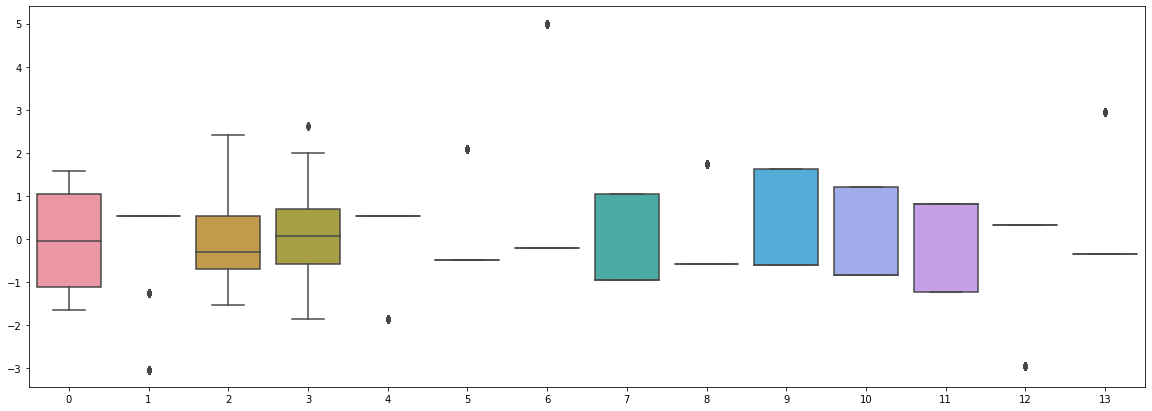

In [45]:
plt.figure(figsize=(20,7))
sns.boxplot(data=X)

In [46]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

# Print the prediction accuracy
from sklearn import metrics
prediction_test = model.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.7110633727175081


In [47]:
df_new.describe()


,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,Education_Bachelors,Education_Masters,Education_PHD,City_Bangalore,City_New Delhi,City_Pune,Gender_Female,Gender_Male,EverBenched_No,EverBenched_Yes
count,2226.000000,2226.0,2226.000000,2226.000000,2226.000000,2226.0,2226.0,2226.0,2226.000000,2226.0,2226.000000,2226.000000,2226.000000,2226.0,2226.0
mean,2014.755615,3.0,29.520665,2.917341,0.236298,1.0,0.0,0.0,0.764151,0.0,0.235849,0.277628,0.722372,1.0,0.0
std,1.847081,0.0,4.912518,1.582885,0.424903,0.0,0.0,0.0,0.424624,0.0,0.424624,0.447930,0.447930,0.0,0.0
min,2012.000000,3.0,22.000000,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.0
25%,2013.000000,3.0,26.000000,2.000000,0.000000,1.0,0.0,0.0,1.000000,0.0,0.000000,0.000000,0.000000,1.0,0.0
50%,2015.000000,3.0,28.000000,3.000000,0.000000,1.0,0.0,0.0,1.000000,0.0,0.000000,0.000000,1.000000,1.0,0.0
75%,2016.000000,3.0,33.000000,4.000000,0.000000,1.0,0.0,0.0,1.000000,0.0,0.000000,1.000000,1.000000,1.0,0.0
max,2018.000000,3.0,41.000000,7.000000,1.000000,1.0,0.0,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.0,0.0


**IMPUTATION**

In [48]:
df_null_1=df[['Age','JoiningYear','ExperienceInCurrentDomain']].copy()
df_null_5=df[['Age','JoiningYear','ExperienceInCurrentDomain']].copy()
df_null_10=df[['Age','JoiningYear','ExperienceInCurrentDomain']].copy()

# Creating a list of 1% data and filling with NaN
empty_1=df_null_1['Age'].sample(frac=0.01, replace=True, random_state=1)
df_null_1.loc[empty_1.index, 'Age'] = np.NaN

# Creating a list of 5% data and filling with NaN
empty_5=df_null_5['Age'].sample(frac=0.05, replace=True, random_state=1)
df_null_5.loc[empty_5.index, 'Age'] = np.NaN

# Creating a list of 10% data and filling with NaN
empty_10=df_null_10['Age'].sample(frac=0.1, replace=True, random_state=1)
df_null_10.loc[empty_10.index, 'Age'] = np.NaN

In [52]:
#import SimpleImputer
from sklearn.impute import SimpleImputer

#Fill with most frequent
simple_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

#For 1%
df_filled_1=pd.DataFrame(simple_imputer.fit_transform(df_null_1))
df_filled_1.columns=df_null_1.columns
df_filled_1.index=df_null_1.index
age_filled_1=df_filled_1.iloc[empty_1.index].Age

#For 5%
df_filled_5=pd.DataFrame(simple_imputer.fit_transform(df_null_5))
df_filled_5.columns=df_null_5.columns
df_filled_5.index=df_null_5.index
age_filled_5=df_filled_5.iloc[empty_5.index].Age

#For 10%
df_filled_10=pd.DataFrame(simple_imputer.fit_transform(df_null_10))
df_filled_10.columns=df_null_10.columns
df_filled_10.index=df_null_10.index
age_filled_10=df_filled_10.iloc[empty_10.index].Age

In [53]:
# Calculation percentage of residual errors
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [54]:
# Percentage of Residual errors at 1%, 5% and 10% data for monthly Charges
MAPE(empty_1, age_filled_1), MAPE(empty_5, age_filled_5), MAPE(empty_10, age_filled_10)

(12.340294281189983, 12.960688373225313, 13.056391761915862)

In [55]:


#Fill with most frequent
simple_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

#For 1%
df_filled_1=pd.DataFrame(simple_imputer.fit_transform(df_null_1))
df_filled_1.columns=df_null_1.columns
df_filled_1.index=df_null_1.index
age_filled_1=df_filled_1.iloc[empty_1.index].Age

#For 5%
df_filled_5=pd.DataFrame(simple_imputer.fit_transform(df_null_5))
df_filled_5.columns=df_null_5.columns
df_filled_5.index=df_null_5.index
age_filled_5=df_filled_5.iloc[empty_5.index].Age

#For 10%
df_filled_10=pd.DataFrame(simple_imputer.fit_transform(df_null_10))
df_filled_10.columns=df_null_10.columns
df_filled_10.index=df_null_10.index
age_filled_10=df_filled_10.iloc[empty_10.index].Age

In [56]:
# Percentage of Residual errors at 1%, 5% and 10% data for monthly Charges
MAPE(empty_1, age_filled_1), MAPE(empty_5, age_filled_5), MAPE(empty_10, age_filled_10)

(10.964193212619431, 12.074154383489278, 12.005869798798354)

In [57]:
#import KNNImputer
from sklearn.impute import KNNImputer

#Fill with most frequent
KNN_imputer = KNNImputer(missing_values=np.nan)

#For 1%
df_filled_1=pd.DataFrame(KNN_imputer.fit_transform(df_null_1))
df_filled_1.columns=df_null_1.columns
df_filled_1.index=df_null_1.index
age_filled_1=df_filled_1.iloc[empty_1.index].Age

#For 5%
df_filled_5=pd.DataFrame(KNN_imputer.fit_transform(df_null_5))
df_filled_5.columns=df_null_5.columns
df_filled_5.index=df_null_5.index
age_filled_5=df_filled_5.iloc[empty_5.index].Age

#For 10%
df_filled_10=pd.DataFrame(KNN_imputer.fit_transform(df_null_10))
df_filled_10.columns=df_null_10.columns
df_filled_10.index=df_null_10.index
age_filled_10=df_filled_10.iloc[empty_10.index].Age

In [58]:
# Percentage of Residual errors at 1%, 5% and 10% data for monthly Charges
MAPE(empty_1, age_filled_1), MAPE(empty_5, age_filled_5), MAPE(empty_10, age_filled_10)

(12.597067558045186, 11.932821816217801, 12.949979306752656)

**Questions and Answwers**

**What are the data types? (Only numeric and categorical)**

A: Both numerical and categorial data types are present in the data set.


**Are there missing values?**

A: There are no missing values


**What are the likely distributions of the numeric variables?**

A: The distibutions have been plotted up.

**Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)**

A: Below are the independent variable:

JoiningYear                 
PaymentTier                  
Age                          
ExperienceInCurrentDomain    
LeaveOrNot                   
Education_Bachelors          
Education_Masters            
Education_PHD                
City_Bangalore               


Three methods used are: Correlation, OLS regression and Logistics Regression


**Which independent variables have missing data? How much?**

A: None idenpendent variable have missing values.

**Do the training and test sets have the same data?**

A: Yes, they have the same set of data as they are split in 80/20. 

**In the predictor variables independent of all the other predictor variables?**

A: No multicollinearity exist.

**Which predictor variables are the most important?**

A:

City_Pune 
Gender_Male 
Gender_Female  
PaymentTier 
City_New Delhi  
ExperienceInCurrentDomain  
City_Bangalore  
EverBenched_No  
EverBenched_Yes     
Education_PHD   
Education_Masters   

**Do the ranges of the predictor variables make sense?**

A: No, since the value of joining year are significalty larger than the other variables


**What are the distributions of the predictor variables?**

A: Plotted above.


**Remove outliers and keep outliers (does if have an effect of the final predictive model)?**

A: There is no significant diffrence.

**Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.**

A: Most Frequent performed well over the others.


For categorical data, calculate the accuracy and a confusion matrix.



Copyright (c) 2022 Rahul-Kodate

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.